<a href="https://colab.research.google.com/github/danielfrgs/LCD-PCCD-2021-1/blob/main/ExamenParcial1_Paradigmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Parcial 1.

Fragoso Alvarado Daniel

Gómez Martinez Jesús Enrique

Rangel Rámirez Hugo

---

1. Obtén las funciones discriminantes del clasificador determinista y también el estadístico para el conjunto de datos Iris; elige al menos dos conjuntos diferentes de columnas para generar funciones diferentes (10p)


El conjunto Iris tiene tres clases distintas: Setosa, Versicolor y Virginica, entonces se crearán 3 funciones discriminantes, una para cada tipo. \\

### Clasificador Determinista:
Recordemos que para el clasificador determinista la función discriminante está dada por la siguiente fórmula:
$$fd_K(X) = X^{T}\cdot Z_K -\frac{1}{2}Z_{K}^{T}\cdot Z_K$$
Donde $K$ son las distintas clases y $Z_K$ es el "prototipo" de la clase, en este caso se usará la media de los valores de la clase para ese prototipo. \\

En el siguiente código se muestrá cómo se calculan los distintos términos de las funciones discriminantes. (Para este clasificador se eligieron las primeras dos columnas del dataset).

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://bit.ly/38XWXS4", names=['SLength','SWidth','PLength','PWidth','Species'])

#Separación de los datos por clase
is_setosa = data.loc[:,'Species'] == 'Iris-setosa'
is_versicolor = data.loc[:,'Species'] == 'Iris-versicolor'
is_virginica = data.loc[:,'Species'] == 'Iris-virginica'

setosa = data.loc[is_setosa] 
versicolor = data.loc[is_versicolor]
virginica = data.loc[is_virginica]

# Elección de las primeras dos columnas
setosa = np.array(setosa.iloc[:,0:2])
versicolor = np.array(versicolor.iloc[:,0:2])
virginica = np.array(virginica.iloc[:,0:2])

# Prototipos de la clase
media_setosa = setosa.mean(axis=0)
media_versicolor = versicolor.mean(axis=0)
media_virginica = virginica.mean(axis=0)

print("Media setosa = ", media_setosa)
print("Media vericolor = ", media_versicolor)
print("Media virginica = ", media_virginica)

# Último sumando de la fórmula
const_setosa = (-.5)*(media_setosa @ media_setosa.T)
const_versicolor = (-.5)*(media_versicolor @ media_versicolor.T)
const_virginica = (-.5)*(media_virginica @ media_virginica.T)

print("\n Último sumando setosa:", const_setosa)
print("\n Último sumando versicolor:", const_versicolor)
print("\n Último sumando vriginica:", const_virginica)

Media setosa =  [5.006 3.418]
Media vericolor =  [5.936 2.77 ]
Media virginica =  [6.588 2.974]

 Último sumando setosa: -18.371380000000002

 Último sumando versicolor: -21.454498

 Último sumando vriginica: -26.12320999999999


Entonces las funciones discriminantes son:

\begin{align}
fd_{setosa}(X) = X^{T} \cdot (5.006, 3.418)^T -18.37138 = 5.006\cdot x_1 + 3.418\cdot x_2 -18.37138\\
fd_{versicolor}(X) = X^{T} \cdot (5.936, 2.77)^T -21.454498 = 5.936 \cdot x_1 + 2.77 \cdot x_2 -21.454498 \\
fd_{virginica}(X) = X^{T} \cdot (6.588, 2.974)^T -26.12321 = 6.588 \cdot x_1 + 2.974 \cdot x_2 -26.12321 \\
\end{align}

\\
### Clasificador Estadístico
Para el clasificador estadístico se sabe que la función discriminante para cada clase es:
$$fd_i(X)=- \frac{1}{2} X^T\cdot C_i^{-1} \cdot X + X^T \cdot C_i^{-1} \cdot m_i -\frac{1}{2}m_i^T \cdot C_i^{-1} \cdot m_i - \frac{1}{2} \ln{|C_i|}$$
Donde $m_i$ es la media de la clase y $C_i$ es la matriz de covarianza de la clase. \\

En el siguiente código se meustra cómo se calculan algunos de los términos de la fórmula. (Se eligieron ahora la tercera y segunda columna para hacer el clasificador, con el objetivo de obtener uno distinto al determinista).

In [ ]:
# Función que calcula matriz de covarianza
def matriz_cov(muestra, por_tuplas=False):
  muestra = np.array(muestra)
  if por_tuplas == True:
    muestra = muestra.T
  dim = muestra.shape[0]
  total = muestra.shape[1]
  media = np.zeros(dim)
  for i in range(dim):
    media[i] = sum(muestra[i,:])/total
  matriz = np.zeros((dim, dim))
  for i in range(dim):
    for j in range(i+1):
      matriz[i,j] = sum((muestra[i,:]-media[i])*(muestra[j,:]-media[j]))/total
      matriz[j,i] = sum((muestra[i,:]-media[i])*(muestra[j,:]-media[j]))/total
  return matriz

# Elección de la tercera y cuarta columna
setosa = data.loc[is_setosa] 
versicolor = data.loc[is_versicolor]
virginica = data.loc[is_virginica]

setosa = np.array(setosa.iloc[:,2:4])
versicolor = np.array(versicolor.iloc[:,2:4])
virginica = np.array(virginica.iloc[:,2:4])

# Calculos relacionados a la función discriminate de setosa

# media
m1 = setosa.mean(axis=0)
# matriz de covarianza
c1 = matriz_cov(setosa,True)
# inversa de la matriz de covarianza
inv_c1 = np.linalg.inv(c1)
#últimos dos sumandos de la fórmula
const1 =  (-.5)*(m1 @ inv_c1 @ m1.T) + (-.5)*np.log(abs(np.linalg.det(c1)))
# Parte del segundo sumando de la fórmula
termino2_1 = inv_c1 @ m1.T

print("\n inversa matriz cov setosa = \n", inv_c1)
print("Parte del segundo término = ", termino2_1)
print("Últimos dos sumandos", const1)


# Calculos relacionados a la función discriminate de versicolor
m2 = versicolor.mean(axis=0)
c2 = matriz_cov(versicolor,True)
inv_c2 = np.linalg.inv(c2)
const2 =  (-.5)*(m2 @ inv_c2 @ m2.T) + (-.5)*np.log(abs(np.linalg.det(c2)))
termino2_2 = inv_c2 @ m2.T
 
print("\n inversa matriz cov versicolor = \n", inv_c2)
print("Parte del segundo término = ", termino2_2)
print("Últimos dos sumandos", const2)

# Calculos relacionados a la función discriminate de virginica

m3 = virginica.mean(axis=0)
c3 = matriz_cov(virginica,True)
inv_c3 = np.linalg.inv(c3)
const3 =  (-.5)*(m3 @ inv_c3 @ m3.T) + (-.5)*np.log(abs(np.linalg.det(c3)))
termino2_3 = inv_c3 @ m3.T
 
print("\n inversa matriz cov virginica = \n", inv_c3)
print("Parte del segundo término = ", termino2_3)
print("Últimos dos sumandos", const3)


 inversa matriz cov setosa = 
 [[ 37.403039   -18.54213155]
 [-18.54213155  97.9704601 ]]
Parte del segundo término =  [50.23376899 -3.24088832]
Últimos dos sumandos -32.321782809461446

 inversa matriz cov versicolor = 
 [[ 12.12391934 -22.66354194]
 [-22.66354194  68.45882853]]
Parte del segundo término =  [21.59603976 -5.77028204]
Últimos dos sumandos -39.2954380820701

 inversa matriz cov virginica = 
 [[ 3.73795535 -2.41942654]
 [-2.41942654 15.09340297]]
Parte del segundo término =  [15.85136995 17.14657825]
Últimos dos sumandos -59.41125849077769


Entonces las funciones discriminantes son: 

\begin{align}
fd_{setosa}(X) &=-\frac{1}{2} X^T\cdot \left(\begin{array}{cc}
37.4030 & -18.5421 \\
-18.5421 & 97.9704
\end{array}\right) \cdot X + X^T \cdot (50.2337, -3.2408) -32.3217 \\
&= X^T\cdot \left(\begin{array}{cc}
-18.7015 & 9.2711 \\
9.2711 & -48.9852
\end{array}\right) \cdot X + 50.2337 \cdot x_1 -3.2408 \cdot x_2 -32.3217
\end{align}

\begin{align}
fd_{versicolor}(X) &=-\frac{1}{2} X^T\cdot \left(\begin{array}{cc}
12.1239 & -22.6635 \\
-22.6635 & 68.4588
\end{array}\right) \cdot X + X^T \cdot (21.5960, -5.7702) -39.2954 \\
&= X^T\cdot \left(\begin{array}{cc}
-6.0619 & 11.3518 \\
11.3518 & -34.2294
\end{array}\right) \cdot X + 21.5960 \cdot x_1 -5.7702 \cdot x_2 -39.2954
\end{align}

\begin{align}
fd_{setosa}(X) &=-\frac{1}{2} X^T\cdot \left(\begin{array}{cc}
3.7379 & -2.4194 \\
-2.4194 & 15.0934
\end{array}\right) \cdot X + X^T \cdot (15.8513, 17.1465) -59.4112 \\
&= X^T\cdot \left(\begin{array}{cc}
-1.8690 & 1.2097 \\
1.2097 & -7.5467
\end{array}\right) \cdot X + 15.8513 \cdot x_1 + 17.1465 \cdot x_2 -59.4112 
\end{align}


Ya no nos da tiempo de hacer esa multiplicación, pero ya está :)

---

2. Aplica la regla de aprendizaje para los pesos de una neurona artificial basada en el modelo del perceptron que calcule la función booleana XOR de dos parámetros mostrando la evolución de los pesos (8p)
Nota: El algoritmo sí termina con pesos inicializados a 0, explica a qué se debe

Veamos que la función booleana XOR esta descrita por:

$$
\begin{array}{cc|c}
x_{1} & x_{2} & y \\
\hline 0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{array}
$$

Recordemos por lo visto en clase que: 

In [ ]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta =0.01, n_iter =50, random_state =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y ):
        rgen = np.random.RandomState(self.random_state)
        if self.random_state is None :
            self.w_ = np.zeros (1 + len (X [1]))
        else :
            self.w_ = rgen.normal (loc = 0.0, scale = 0.01, size = 1 + X.shape [1])
            self.errors_ = []
        for _ in range (self.n_iter):
            errors = 0
            for xi , yi in zip (X , y ):
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            print(self.w_)
            self.errors_.append(errors)
        return self
                                       
    def net_input(self , X):
        return np.dot (X , self.w_[1:]) + self.w_[0]
                                       
    def predict(self , X ):
        return np.where (self.net_input(X) >= 0.0 , 1, -1)

Aplicamos el modelo a los pesos de una función booleana XOR.

In [ ]:
X =  np.array([[0 ,0], [0 ,1], [1 ,0], [1 ,1]])
y =  np.array([0 ,1 ,1 , 0])

ppn = Perceptron(n_iter =6, eta =0.1)
ppn.fit(X, y)
print('Pesos : %s ' % ppn.w_)

[ 0.01624345 -0.10611756  0.09471828]
[ 0.01624345 -0.00611756 -0.00528172]
[ 0.01624345 -0.10611756  0.09471828]
[ 0.01624345 -0.00611756 -0.00528172]
[ 0.01624345 -0.10611756  0.09471828]
[ 0.01624345 -0.00611756 -0.00528172]
Pesos : [ 0.01624345 -0.00611756 -0.00528172] 


Cuando se inicializan los pesos en $0$, el parámetro $\eta$  afecta unicamente la escala del vector de pesos, pero deja intacta la dirección de este, dando lugar así a que el algortimo concluya pero no realice una eficiente y correcta tasa de aprendizaje sobre los pesos.

----

3. ¿La regresión logística puede separar bien la función booleana XOR de dos parámetros? Argumenta tu respuesta (5p)

No es posible separarlos bien. Si utilizamos un diagrama que muestre las sálidas de la función booleana XOR, teniendo como ejes los parámetros de entrada, encontraremos que las sálidas forman un cuadrado donde, justamente las sálidas verdaderas están en vértices opuestos de la figura, de tal modo que utilizar una recta para separarlas no es viable. Luego, al no poder separarse bien linealmente, no existe garantía de que la regla de aprendizaje converja.

---

4. Escribe un pseudocódigo detallado del algoritmo Sequential Forward Selection (5p)

El *Sequential Forward Selection (SFS)*, al igual que el *SBS*, pertenecen a una familia de algoritmos cuya función principal es reducir la dimensionalidad del conjunto de datos con el propósito de minimizar el error, mejorar la eficiencia computacional y eliminar ruido y datos innecesarios para la resolución de un determinado problema.

El *SFS* recibe el conjunto completo de dimensión $d$ y regresa un subconjunto de dimensión $k < d$, con $k$ el número de características especificado a priori.

El algoritmo inicia creando un conjunto vacío (y por ende $k=0$).
Luego se añade una característica $x$ al conjunto vacío. 
Esta característica es la que maximiza la eficiencia del clasificador o función de criterio cuando se agrega al conjunto.
Se repite esto hasta que se satisfaga el criterio para terminar el proceso.
El criterio para terminar es aquel que se estableció a priori, es decir, el algoritmo sigue añadiendo caractarísticas hasta que $k=p$ para una $p$ determinada.

En general es fácil darse cuenta que este algoritmo hace lo análogo al *SBS*

**Pseudocodigo**

1.- Crear un conjunto vacío $X_{k}=\{\varnothing\}$

2.- Seleccionar la mejor característica $x=\arg \max J(X_{k}+x)$ del conjunto completo

3.- Si $J(X_{k}+x)> J(X_{k})$, actualizamos $X_{k+1}=X_{k}+x$

4.- Hacemos $k=k+1$ y volvemos al paso 2.

----

5. ¿Qué sucede al utilizar Linear Discriminant Analysis (LDA) sobre el conjunto de medias
lunas? Escribe un código que lo muestre (7p)

**Respuesta:**

Recordemos que el objetivo de LDA es encontrar un subespacio de características que optimice la separabilidad de clases. Sin embargo, el algoritmo requiere de una clara definición, o mejor dicho, separación entre los datos para su clasificación, lo que no ocurre con las medias lunas, por lo que esperariamos que no lo logre clasificar, más aún, debido a la falta de caracteristicas para geneerar el subespacio, solo generará una proyección donde parte de los datos estarán encimados.

A continuación se muestra un código, aplicando LDA cargado en Skalearn:

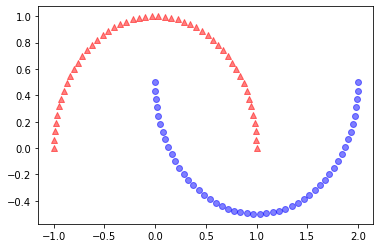

In [ ]:
# Primero vamos a importar las medias lunas de sklearn
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

X, y = make_moons(n_samples =100, random_state=123)

# Vamos a gráficarlas para tener una muestra visual:
plt.scatter(X[y==0, 0], X[y==0, 1], color= 'red', marker='^', alpha =0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color= 'blue' , marker='o', alpha=0.5)
plt.show()

In [ ]:
# Vamos a separar en entrenamiento y prueba 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.3)

In [ ]:
# Estandarizamos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform (X_test)

In [ ]:
# Importamos el LDA de sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Regresión lineal:
from sklearn.linear_model import LogisticRegression

# inicializar LDA y el modelo de RL
# n_components se hace 1
lda = LDA(n_components=1)

# Regresión lineal como clasificador:
lr = LogisticRegression()

# Ajustar y transformar los datos
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr.fit(X_train_lda ,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


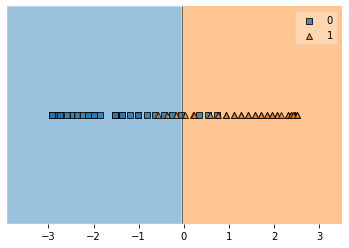

In [ ]:
# Vamos a gráficar:

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_lda , y_train, clf=lr)
plt.show()

---


6. Escribe un código que utilice KernelPCA con rbf y otra función de kernel para separar
círculos concéntricos; compara los resultados con el uso de PCA sobre los mismos datos (10p)

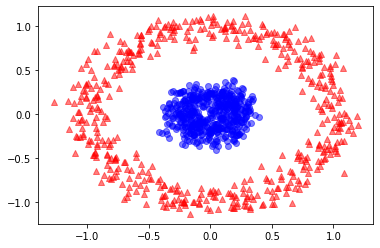

In [ ]:
# Vamos a importar el conjunto de datos de Circulos Concentricos desde skalearn:

from sklearn.datasets import make_circles
X, y = make_circles(n_samples =1000, random_state=123, noise=0.1, factor=0.2)

# Vamos a Gráficar:

plt.scatter(X[y==0, 0], X[y==0, 1], color= 'red', marker='^', alpha =0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color= 'blue' , marker='o', alpha=0.5)
plt.show()

In [ ]:
# Vamos a importar Kernel PCA desde Skalearn
from sklearn.decomposition import KernelPCA

# Vamos a inicializar dos clasificadores, cada uno con kernels diferentes, uno con
# 'rbf' - radial basis function
# 'poly' -  Polinomial

kpca1 = KernelPCA(n_components=1, kernel= 'rbf', gamma=15)
kpca2 = KernelPCA(n_components=1, kernel= 'poly', gamma=15)

**RBF**

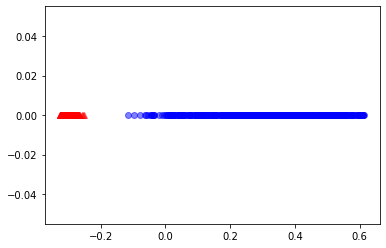

In [ ]:
# Vamos a Clasificar:
X_kpca1 = kpca1.fit_transform(X)

# Gráfica
plt.scatter(X_kpca1[y==0, 0], np.zeros((500,1)), color='red',
marker='^', alpha =0.5)
plt.scatter(X_kpca1[y==1, 0], np.zeros((500,1)), color='blue',
marker='o', alpha=0.5)

**POLY**

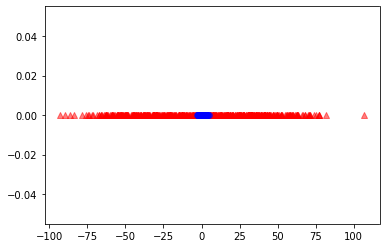

In [ ]:
# Vamos a Clasificar:
X_kpca2 = kpca2.fit_transform(X)

# Gráfica
plt.scatter(X_kpca2[y==0, 0], np.zeros((500,1)), color='red',
marker='^', alpha =0.5)
plt.scatter(X_kpca2[y==1, 0], np.zeros((500,1)), color='blue',
marker='o', alpha=0.5)

**PCA** 

Vamos a clasificar por medio de PCA de Skalearn, aunque es de esperarse que no lo logre clasificar y solo proyecte.

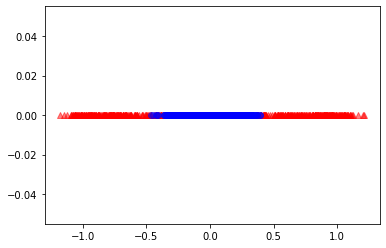

In [ ]:
# Importamos PCA
from sklearn.decomposition import PCA

# Iniciamos y Clasificamos
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Gráfica

plt.scatter(X_pca[y==0, 0], np.zeros((500,1)), color='red',
marker='^', alpha =0.5)
plt.scatter(X_pca[y==1, 0], np.zeros((500,1)), color='blue',
marker='o', alpha=0.5)

---

7. Elige dos estimadores y demuestra que definen algoritmos escalables (10p)

  $\underset{p \times 1}{\mathbf{x}}=n^{-1}\left[\sum_{i=1}^{n} x_{i, 1}, \ldots, \sum_{i=1}^{n} x_{i, p}\right]^{T} \quad \hat{\sigma}_{j}^{2}=n^{-1} \sum_{i=1}^{n} x_{i, j}^{2}-\bar{x}_{j}^{2} \quad \hat{\sigma}_{j k}=n^{-1} \sum_{i=1}^{n} x_{i, j} x_{i, k}-\bar{x}_{j} \bar{x}_{k}$

1. Sea un conjunto de datos consistente de $n$ observaciones $D=\left\{\mathbf{x}_{1}, \ldots, \mathbf{x}_{n}\right\}$, donde cada una es un vector de $p$ variables $\underset{p \times 1}{\mathbf{x}_{i}}=\left[x_{i, 1}, \ldots, x_{i, p}\right]^{T}$

  Dividamos el conjunto $D$ en $\boldsymbol{D}_{1}=\left\{\mathbf{x}_{1}, \ldots, \mathbf{x}_{m}\right\}$ у $D_{2}=\left\{\mathbf{x}_{m+1}, \ldots, \mathbf{x}_{n}\right\}$
    
Entonces podemos pensar al estimador como:
    
$$
\underset{2 \times \mathbf{1}}{s(D)}= \left[\begin{array}{c}
\left[\sum_{i=1}^{m} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p}\right]^{T} \\
n
\end{array}\right]
$$
    
Calculemos cada una de forma que:

$$\underset{p \times 1}{\mathbf{x_1}}=\left[\sum_{i=1}^{m} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p}\right]^{T}$$

$$\underset{p \times 1}{\mathbf{x_2}}=\left[\sum_{i=(m+1)}^{n} x_{i, 1}, \ldots, \sum_{i=(m+1)}^{n} x_{i, p}\right]^{T}$$

Sumemos ambbos resultados, recordmos que los vectores se suman componente por componente:

$$
\begin{align}
\underset{p \times 1}{\mathbf{x_1}} + \underset{p \times 1}{\mathbf{x_2}} = &  \left[\sum_{i=1}^{m} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p}\right]^{T} + \left[\sum_{i=(m+1)}^{n} x_{i, 1}, \ldots, \sum_{i=(m+1)}^{n} x_{i, p}\right]^{T} \\
     = &  \left[\sum_{i=1}^{m} x_{i, 1} + \sum_{i=(m+1)}^{n} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p} + \sum_{i=(m+1)}^{n} x_{i, p}\right]^{T} \\
     = & \left[\sum_{i=1}^{n} x_{i, 1}, \ldots, \sum_{i=1}^{n} x_{i, p}\right]^{T}
     \end{align}
$$
    
Entonces:
    
$$
\underset{2 \times \mathbf{1}}{s(D_1)} + \underset{2 \times \mathbf{1}}{s(D_2)} = \left[\begin{array}{c}
\underset{p \times 1}{\mathbf{x_1}} + \underset{p \times 1}{\mathbf{x_2}} \\
 m + (n-m)
\end{array}\right] = 
\left[\begin{array}{c}
\left[\sum_{i=1}^{m} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p}\right]^{T} \\
n
\end{array}\right] = \underset{2 \times \mathbf{1}}{s(D)}
$$

Por lo que se trata de Algoritmos escalables (aunque habría que demostrar que se cumple para k+1).

2. Notemos que como $\hat{\sigma}^{2}=\frac{1}{n}\sum_{i=1}^{n}x_{i}^{2}-(\frac{1}{n}\sum_{i=1}^{n}x_{i})^{2}$, se puede usar el primer ejercicio para mostrar que este también define un algoritmo escalable.

  Utilizamos la estadística asociativa

  $$
  \underset{3 \times \mathbf{1}}{s(D)}= \left[\begin{array}{c}
  \sum_{i=1}^{n} x_{i} \\
  \sum_{i=1}^{n} x_{i}^{2}\\
  n
  \end{array}\right]
  $$

  Donde, la primer parte es idéntica al primer inciso de este ejercicio, y la segunda es análoga pues:

  Tomamos los mismos subconjuntos $D_1=\left\{\mathbf{x}_{1}, \ldots, \mathbf{x}_{m}\right\}$ y $D_2=\left\{\mathbf{x}_{m+1}, \ldots, \mathbf{x}_{n}\right\}$

  Cada término está elevado al cuadrado ahora, sin embargo esto no afecta al procedimiento general, pues la suma no depende de la forma de cada uno de esos terminos y prevalece su asociatividad.

  $$\underset{p \times 1}{\overline{\mathbf{x_1^{2}}}}=\left[\sum_{i=1}^{m} x_{i, 1}^{2}, \ldots, \sum_{i=1}^{m} x_{i, p}^{2}\right]^{T}$$

  $$\underset{p \times 1}{\overline{\mathbf{x_2^{2}}}}=\left[\sum_{i=(m+1)}^{n} x_{i, 1}^{2}, \ldots, \sum_{i=(m+1)}^{n} x_{i, p}^{2}\right]^{T}$$

  $$
      \begin{align}
      \underset{p \times 1}{\overline{\mathbf{x_1^{2}}}} + \underset{p \times 1}{\overline{\mathbf{x_2^{2}}}} = &  \left[\sum_{i=1}^{m} x_{i, 1}^{2}, \ldots, \sum_{i=1}^{m} x_{i, p}^{2}\right]^{T} + \left[\sum_{i=(m+1)}^{n} x_{i, 1}^{2}, \ldots, \sum_{i=(m+1)}^{n} x_{i, p}^{2}\right]^{T} \\
  = &  \left[\sum_{i=1}^{m} x_{i, 1}^{2} + \sum_{i=(m+1)}^{n} x_{i, 1}^{2}, \ldots, \sum_{i=1}^{m} x_{i, p}^{2} + \sum_{i=(m+1)}^{n} x_{i, p}^{2}\right]^{T} \\
  = & \left[\sum_{i=1}^{n} x_{i, 1}^{2}, \ldots, \sum_{i=1}^{n} x_{i, p}^{2}\right]^{T}
      \end{align}
  $$

  Por lo tanto, se tiene un algoritmo escalable para la varianza también.

----

8. Obtén las expresiones para determinar los intervalos de contenedores para histogramas bidimensionales en función del número de contenedores (5p)

En un histograma bidimensional, se debe de considerar una dimensión extra, que no necesariamente tiene la misma longitud de nuestro intervalo en la primera demensión, digamos el intervalo $x$. Entonces si $x(n)$ y $y(n)$ son los máximos de cada dimensión y $x(1)$ y $y(1)$ son los mínimos, sean $a=x(n)-x(1)$ y $b=y(n)-y(1)$  los intervalos de cada una de nuestras dimensiones y $h^2$ el número de intervaos deseados; podemos definir a los intervalos del histograma bidimencional de la siguiene forma:

Cuando tenemos un histograma unidimencional, sabemos que, cada intervalo esta definido entre el valor $x(1)$ y la suma de el grosor de cada bin hasta llegar a $x(n)$, es decir la longitud del intervalo $a$ entre el número de contenedores que queremos $h$ de forma que tenemos:

Los intervalos de la primera dimensión:

$$
\begin{aligned}
a_{1}=&\left[x_{1}, x_{1}+\frac{a}{h}\right] \\
& \vdots \\
a_{i}=&\left(x_{1}+(i-1) \frac{a}{h}, x_{1}+(i) \frac{a}{h}\right] \\
& \vdots \\
a_{h}=&\left(x_{1}+(h-1) \frac{a}{h}, x_{n}\right]
\end{aligned}
$$

Los intervalos de la segunda dimensión:

$$
\begin{aligned}
b_{1}=&\left[y_{1}, y_{1}+\frac{b}{h}\right] \\
& \vdots \\
b_{i}=&\left(y_{1}+(i-1) \frac{b}{h}, y_{1}+(i) \frac{b}{h}\right] \\
& \vdots \\
b_{h}=&\left(y_{1}+(h-1) \frac{b}{h}, y_{n}\right]
\end{aligned}
$$

Y entonces podemos hacer:

$$
B=\left\{b_{1}, \ldots, b_{h}\right\}
$$

$$
A=\left\{a_{1}, \ldots, a_{h}\right\}
$$

Enonces la función para los intervalos bidimensionales es:

$$
C_{i}(h) = A \times B = \left\{
\begin{array}{ll}
\left[x_{1}, x_{1}+\frac{a}{h}\right] \times \left[y_{1}, y_{1}+\frac{b}{h}\right]  & , i = 1\\
\left(x_{1}+(i-1) \frac{a}{h}, x_{1}+(i) \frac{a}{h}\right] \times \left(y_{1}+(i-1) \frac{b}{h}, y_{1}+(i) \frac{b}{h}\right] & , 1<i \leq h
\end{array}
\right.
$$

----

9. Un resorte se somete a estiramiento aplicando distintos pesos $(\mathbf{X})$ y se anotó su alargamiento (y); utilizando la solución de la ecuación normal, determina los estimadores $\hat{\boldsymbol{\beta}}, \sigma_{\epsilon}^{2}, \operatorname{var}(\hat{\boldsymbol{\beta}})$
  $$
  \begin{aligned}
  &\mathbf{X}=[0.5,1.07,1.64,2.21,2.79,3.36,3.93,4.5] \\
  &\mathbf{y}=[0.19,0.25,0.51,0.57,0.83,0.99,1.06,1.31]
  \end{aligned}
  $$
  Debes mostrar la forma de calcular $\mathbf{X}^{T} \mathbf{X}$ y su inversa $(10 p)$

Recordemos que se trata de un estimador de minimos cuadrados, es decir busca una linea recta que se acople. Al tratarse de un resorte sometiendose a un estiramiento podemos pensar en la ley de Hook, donde entonces buscamos $\boldsymbol{L}=\boldsymbol{m} \boldsymbol{F}+\boldsymbol{n} \text { que mejor se ajuste a los datos. }$

Vamos a solucionarlo mediante un código que nos permita ser mñás agil con las cuentas (porque ya no hay tiempo :c):

$\hat{\boldsymbol{\beta}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y}$

In [ ]:
# Definamos los arrays:

# Recordemos que tenemos que extender la matriz X para que se adapte a una función lineal
X=[[0.5,1.07,1.64,2.21,2.79,3.36,3.93,4.5], [1,1,1,1,1,1,1,1]]
y=[[0.19,0.25,0.51,0.57,0.83,0.99,1.06,1.31]]

X = np.array(X).T
y = np.array(y).T

In [ ]:
# Hagamos la primera operación XT*X
X1 = np.dot(X.T, X)
X1

array([[63.7372, 20.    ],
       [20.    ,  8.    ]])

Para la inversa:

Encontrar la inversa de la matriz de $2 \times 2$ mediante la fórmula: $A^{(-1)}=\left(\begin{array}{cc}a & b \\ c & d\end{array}\right)^{(-1)}=\frac{1}{\operatorname{det}(A)} \cdot\left(\begin{array}{ll}C_{11} & C_{21} \\ C_{12} & C_{22}\end{array}\right)=\frac{1}{a d-b c} \cdot\left(\begin{array}{cc}d & -b \\ -c & a\end{array}\right)$
$$
\left(\begin{array}{cc}
\frac{159343}{2500} & 20 \\
20 & 8
\end{array}\right)^{(-1)}=\frac{1}{\frac{159343}{2500} \cdot 8-20 \cdot 20} \cdot\left(\begin{array}{cc}
8 & -20 \\
-20 & \frac{159343}{2500}
\end{array}\right)=\left(\begin{array}{ll}
\frac{2500}{34343} & \frac{-6250}{34343} \\
\frac{-6250}{34343} & \frac{159343}{274744}
\end{array}\right)
$$

In [ ]:
# Inversa

X1 = np.linalg.inv(X1)
X1

array([[ 0.07279504, -0.1819876 ],
       [-0.1819876 ,  0.57996899]])

In [ ]:
# Hagamos la multiplicación X.T * y

X2 = np.dot(X.T, y)
X2

array([[18.1615],
       [ 5.71  ]])

In [ ]:
# Finalmente hagamos la multiplicaciones de ambas matrices para obener el estimador:

B = np.dot(X1, X2)
B

array([[0.28291792],
       [0.00645521]])

$\sigma_{\epsilon}^{2}=\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{n-q}$,  donde $\hat{y}=\mathbf{x}_{i}^{T} \hat{\boldsymbol{\beta}}$

In [ ]:
# Vamos a calcular y gorrito

yv = []
for i in range(len(X)):
    yv.append(list(np.dot(X[i].T, B)))

yv

[[0.1479141673703526],
 [0.30917737966980224],
 [0.47044059196925186],
 [0.6317038042687017],
 [0.7957961957312996],
 [0.9570594080307492],
 [1.118322620330199],
 [1.2795858326296485]]

In [ ]:
# Vamos a calcular la suma
sumas = []
for i in range(len(y)):
    sumas.append((y[i]-yv[i])**2)
    
# Vamos a calucular por último el estimador dividiendo por la diferencia de la dimensión de X

sigma = sum(sumas)/(len(X) - len(X.T))
sigma

array([0.00287117])

$\operatorname{var}(\hat{\boldsymbol{\beta}})=\sigma_{\epsilon}^{2}\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1}$

In [ ]:
# Tomemos los valores ya calculados de forma que:

var = sigma * X1
var

array([[ 0.00020901, -0.00052252],
       [-0.00052252,  0.00166519]])

----

10. Con los datos del problema anterior, escribe un código para comparar el resultado obtenido con la regresión lineal estándar y el uso de las regularizaciones Lasso y ElasticNet tomando dos muestras para entrenamiento (5p)

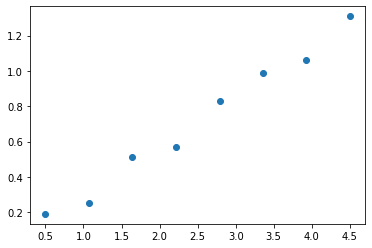

In [ ]:
# Especifiquemos los conjuntos de nuevo 

x = [0.5,1.07,1.64,2.21,2.79,3.36,3.93,4.5]
y = [0.19,0.25,0.51,0.57,0.83,0.99,1.06,1.31]

# Definamos los inervalos de enrenamiento y prueba 
# Dado la cantidad de daos sí nos da para generar entrebnamiento con 3
X_train ,y_train = np.array([1.07,2.79, 4.5]), np.array ([0.25 ,0.83, 1.31])
X_test ,y_test = np.array([0.5,1.64,2.21,3.36,3.93]), np.array([0.19,0.51,0.57,0.99,1.06])

# Gráfiquemos
plt.scatter(x,y)

In [ ]:
# Vamos a importar la biblioteca de regresión lineal de Skalearn y Lasso y ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Generamos las matrices de valores extendidas

X_train.resize(len(X_train),1)
y_train.resize(len(y_train),1)

# Inicializamos los modelos:
modelo = LinearRegression()
modelo1 = Lasso(alpha = 0.3)
modelo2 = ElasticNet(alpha = 0.3)

# Ajustamos con cada modelo
modelo.fit(X_train ,y_train)
modelo1.fit(X_train ,y_train)
modelo2.fit(X_train ,y_train)


ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

**Regresión lineal**

In [ ]:
coefs = modelo.coef_[0]
intercept = modelo.intercept_[0]
print("y = {:.4f} + {:.4f}x".format(intercept ,coefs[0]))

y = -0.0646 + 0.3091x


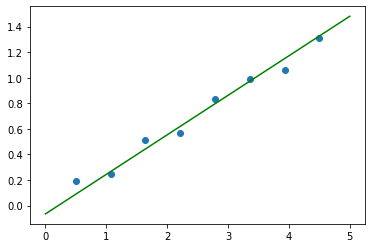

In [ ]:
# Gráfica

xx = np.linspace(0.0,5,2)
yy = modelo.predict(xx.reshape(len(xx),1))
plt.scatter(x,y)
plt.plot(xx ,yy ,c='g')

Esta se encuentra cobre ajustado a los puntos que definimos.

**LASSO**

In [ ]:
coefs = modelo1.coef_[0]
intercept = modelo1.intercept_[0]
print("y = {:.4f} + {:.4f}x".format(intercept ,coefs))

y = 0.3618 + 0.1561x


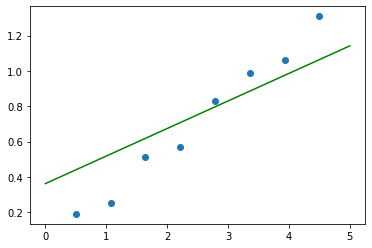

In [ ]:
# Gráfica
xx = np.linspace(0.0,5,2)
yy = modelo1.predict(xx.reshape(len(xx),1))
plt.scatter(x,y)
plt.plot(xx ,yy ,c='g')

**ELASTIC NET**

In [ ]:
coefs = modelo2.coef_[0]
intercept = modelo2.intercept_[0]
print("y = {:.4f} + {:.4f}x".format(intercept ,coefs))

y = 0.1946 + 0.2160x


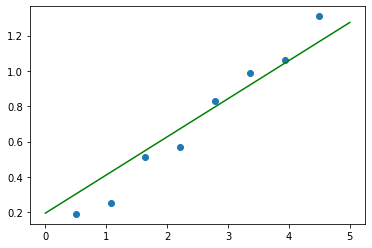

In [ ]:
# Gráfica 
xx = np.linspace(0.0,5,2)
yy = modelo2.predict(xx.reshape(len(xx),1))
plt.scatter(x,y)
plt.plot(xx ,yy ,c='g')